### Zadanie 1

Podpunkt a)
Wariancja estymatora 2.5378367259250968e-05
Błąd średniokwadratowy estymatora 2.6128947479299436e-05
Obciążenie estymatora 0.0008663603292213152
Podpunkt b)
Wariancja estymatora 0.0014881958477327478
Błąd średniokwadratowy estymatora 0.0014953658812696682
Obciążenie estymatora 0.0026776918300880637
Podpunkt c)
Wariancja estymatora 0.0034666973730471382
Błąd średniokwadratowy estymatora 0.0034671381642082336
Obciążenie estymatora 0.0006639210503479598
Podpunkt d)
Wariancja estymatora 0.001488195847732747
Błąd średniokwadratowy estymatora 0.0014953658812696666
Obciążenie estymatora -0.002677691830088036
Podpunkt e)
Wariancja estymatora 2.5378367259250968e-05
Błąd średniokwadratowy estymatora 2.6128947479299436e-05
Obciążenie estymatora -0.0008663603292212718


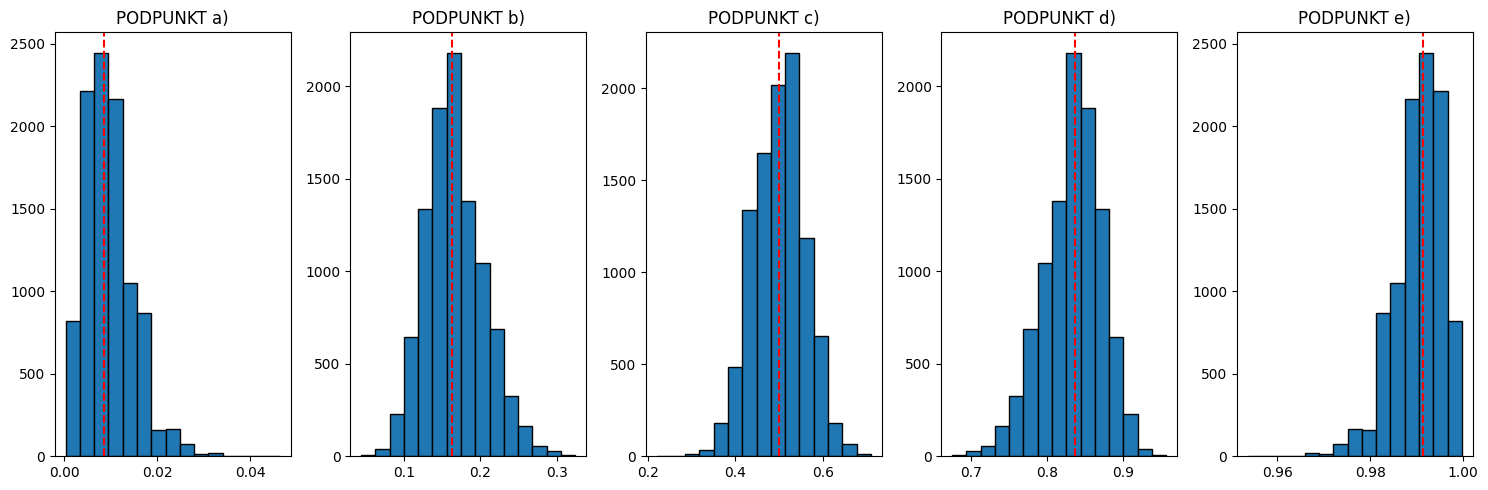

In [5]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

n = 50

N = 10000
w = 5
name = ['a)', 'b)', 'c)', 'd)', 'e)']
p = [0.1, 0.3, 0.5, 0.7, 0.9]
r = [(j - 0.1, j + 0.1) for j in p]

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for j in range(5):
    est = []
    print('Podpunkt', name[j])
    for i in range(N):
        np.random.seed(i)
        data = np.random.binomial(w, p[j], n)
        p_0 = np.sum(data) / (w * n)
        est.append(1 - binom.cdf(2, w, p_0))

    est = np.array(est)
    ax = axes[j]
    ax.hist(est, bins=15, edgecolor='black')
    ax.set_title('PODPUNKT ' + name[j])
    ax.axvline(x=1 - binom.cdf(2, w, p[j]), color='red', linestyle='--', label='Red Line at x=1.0')
    print('Wariancja estymatora', est.var())
    true = np.full(N, 1 - binom.cdf(2, w, p[j]))
    errors = est - true
    squared = errors**2
    mse = np.mean(squared)
    o = np.mean(est) - (1 - binom.cdf(2, w, p[j]))
    print('Błąd średniokwadratowy estymatora', mse)
    print('Obciążenie estymatora', o)

plt.tight_layout()
plt.show()


Na początku liczmy estymator największej wiarogodności parametru $p $

$
{L(p)=\prod_{i=1}^{n} \binom{5}{x_i} p^i (1-p)^{5-x_i}}
$

$ {l(p)=\ln(L(p))=
\ln ( \prod_{i=1}^{n} \binom{5}{x_i} p^{x_i} (1-p)^{5-x_i})=\sum_{i=1}^{n} \ln\binom{5}{x_i} + x_i\ln p  + (5-x_i) \ln (1-p)} $

$ {\frac{dl(p)}{dp}=\sum_{i=1}^{n} \frac{x_i}{p} - \frac{5-x_i}{1-p}=\sum_{i=1}^{n} \frac{x_i-5p}{p(1-p)}} $

Rozwiązując równanie $ \frac{dl(p)}{dp}=0 $ otrzymujemy $ p=\frac{\sum_{i=1}^{n} x_i}{5n}$

Stąd wiemy, że $ \frac{\sum_{i=1}^{n} x_i}{5n}$ jest estymatorem największej wiarogodności parametru $ p$. 

### Twierdzenie o estymatorach największej wiarygodności dla przekształconych parametrów

$$\text{Jeżeli } \hat{\theta} \text{ jest estymatorem największej wiarogodności parametru } \theta \text{ w pewnym modelu statystycznym,}$$
$$\text{a } g: \Theta \longrightarrow \mathbb{R} \text{ jest funkcją ciągłą, to } g(\hat{\theta}) \text{ jest estymatorem największej wiarygodności parametru } g(\theta).$$


Poszukujemy estymatora największej wiarogodności wartości ${P(X \geq 3)}={1-P(X \leq 2)}= 1 - {F(2)} $. Z powyższego twierdzenia wynika, że wystarczy policzyć dystrybuantę $F$ rozkładu dwumianowego w punkcie $x_0=2$ przyjmując $ p=\frac{\sum_{i=1}^{n} x_i}{5n} $


Wariancja oraz błąd średniokwadratowy osiągają najmniejszą wartość dla podpunktu a) oraz e), czyli wówczas gdy $ p $ jest blisko wartości 0 lub 1. Najmniejsze obciążenie posiada estymator z podpunktu c) - histogram jest najbardziej symetryczny względem rzeczywistej wartości.

### Zadanie 2

$ {L(\lambda) = \prod_{i=1}^{n} \frac{e^{-\lambda} \cdot \lambda^{x_i}}{x_i!}=e^{-n\lambda}\lambda^{\sum_{i=1}^{n}x_i}}\frac{1}{\prod_{i=1}^{n} x_i!} $


$ {l(\lambda)=\ln L(\lambda) = -n\lambda + \sum_{i=1}^{n} x_i\ln(\lambda) - \ln(\prod_{i=1}^{n} x_i!)} $



$
{
\frac{d}{d\lambda} l(\lambda) = \frac{d}{d\lambda} \left(-n\lambda + \sum_{i=1}^{n} x_i\ln(\lambda) - \ln\left(\prod_{i=1}^{n} x_i!\right)\right) = -n + \sum_{i=1}^{n} \frac{x_i}{\lambda}
}
$




Rozważając $ \frac{d}{d\lambda} l(\lambda)=0 $ otrzymujemy: $ \hat{\lambda}=\frac{\sum_{i=1}^{n} x_i}{n} $ jako estymator największej wiarogodności parametru $ \lambda $.

Wiemy, że  $
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}
$. Na mocy **twierdzenia o estymatorach największej wiarygodności dla przekształconych parametrów** wiemy, że 

$ \Huge{\widehat{P(X = k)}=\frac{\hat{\lambda}^k e^{-\hat{\lambda}}}{k!}} $


PODPUNKT a)
k =  0
Wariancja estymatora 0.0037058946180015843
Błąd średniokwadratowy estymatora 0.0037135545643729303
Obciążenie estymatora 0.002767660812192596
k =  1
Wariancja estymatora 0.000966823805742063
Błąd średniokwadratowy estymatora 0.0009864778613922903
Obciążenie estymatora -0.004433289484144676
k =  2
Wariancja estymatora 0.0005038456448078389
Błąd średniokwadratowy estymatora 0.0005040868985175914
Obciążenie estymatora 0.0004911758440239861
k =  3
Wariancja estymatora 4.2865126129024316e-05
Błąd średniokwadratowy estymatora 4.358006735963114e-05
Obciążenie estymatora 0.0008455419744795769
k =  4
Wariancja estymatora 1.6162123751769841e-06
Błąd średniokwadratowy estymatora 1.688747778204858e-06
Obciążenie estymatora 0.00026932397410530285
k =  5
Wariancja estymatora 3.624070142506053e-08
Błąd średniokwadratowy estymatora 3.889144321022234e-08
Obciążenie estymatora 5.1485355055217526e-05
k =  6
Wariancja estymatora 5.571493534551446e-10
Błąd średniokwadratowy estymatora 6.

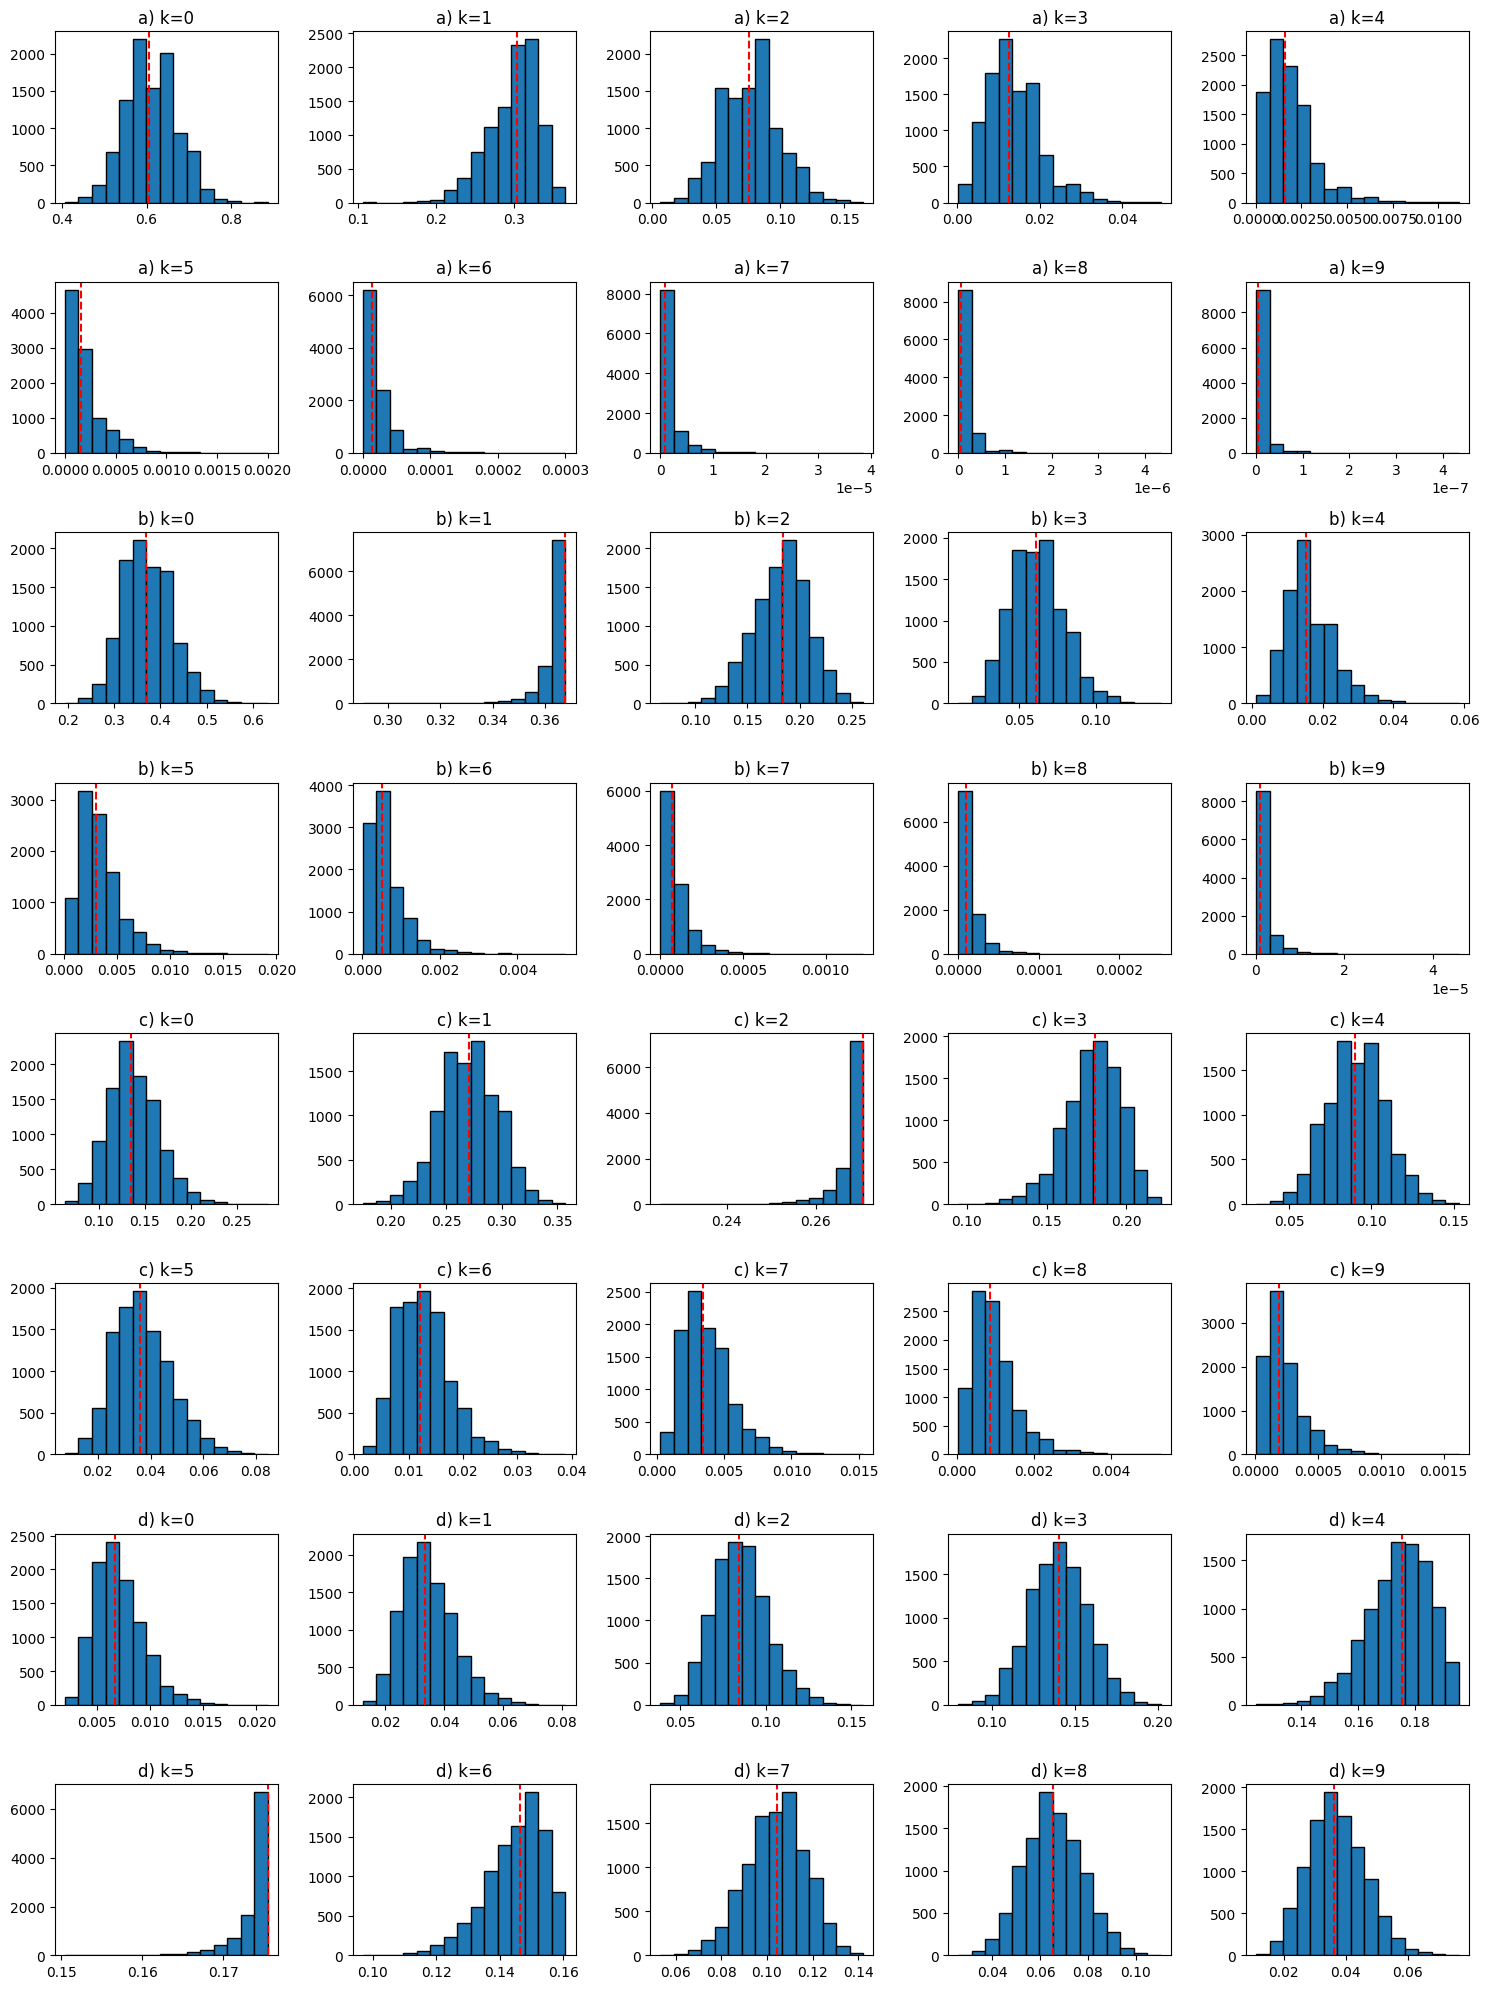

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt

n = 50

def f(l, k):
    return (l**k * np.exp(-l)) / math.factorial(k)

N = 10000
w = 5
name = ['a)', 'b)', 'c)', 'd)']
p = [0.5, 1, 2, 5]
r = [(j - 0.1, j + 0.1) for j in p]

fig, axes = plt.subplots(8, 5, figsize=(15, 20))

for j in range(4):
    
    print('PODPUNKT',name[j])

    for k in range(11):
        print('k = ', str(k))
        row =  2*j+(k>=5)
        col = (k % 5)
        if (k!=10):
            ax = axes[row, col]
            ax.set_title(name[j] + " k=" + str(k))
        est = []

        for i in range(N):
            np.random.seed(i)
            data = np.random.poisson(p[j], n)
            p_0 = np.mean(data)
            est.append(f(p_0, k))

        
        est = np.array(est)
        if(k!=10):
            ax.hist(est, bins=15, edgecolor='black')
            ax.axvline(x=f(p[j], k), color='red', linestyle='--', label='Red Line at x=1.0')
        print('Wariancja estymatora', est.var())
        true = np.full(N, f(p[j], k))
        errors = est - true
        squared = errors**2
        mse = np.mean(squared)
        o = np.mean(est) - f(p[j], k)
        print('Błąd średniokwadratowy estymatora', mse)
        print('Obciążenie estymatora', o)

plt.tight_layout() 
plt.show()


W obrębie każdego z podpunktów wraz ze wzrostem $ k $ otrzymujemy coraz dokładniejsze estymacje:

* w przypaku podpunktu a) obciążenie maleje z wartości rzędu $ 10^{-3}$ do $ 10^{-10} $, natomiast wariancja i błąd średniokwadratowy - z $ 10^{-3}$  do $ 10^{-18} $

* w przypaku podpunktu b) obciążenie maleje z wartości rzędu $ 10^{-3}$ do $ 10^{-8} $, natomiast wariancja i błąd średniokwadratowy - z $ 10^{-3}$  do $ 10^{-14} $

*  w przypaku podpunktu c) obciążenie maleje z wartości rzędu $ 10^{-3}$ do $ 10^{-5} $, natomiast wariancja i błąd średniokwadratowy - z $ 10^{-4}$  do $ 10^{-9} $

* w przypaku podpunktu d) rząd obciążenia nie zmienia się ($10^{-4}$), natomiast wariancja i błąd średniokwadratowy rośnie z $ 10^{-6}$  do $ 10^{-5} $

Możemy zatem zaobserwować, że wraz ze wzrostem $\lambda$ estymatory stają się mniej wrażliwe na zmianę wartości $ k $. To nie powinno nas dziwić, gdyż $k$ należy do ustalonego przedziału $[0,10] $. Rozważając coraz większe $\lambda$ funkcja masy prawdopodobieństwa się wypłaszcza, a zatem różnice między wartościami $P(X = k)$ dla $k$ pochodzących z ustalonego przedziału będą coraz mniejsze.

### Zadanie 3

Celem rozdziału jest wyjaśnienie sposobu komputerowego generowania prób z ustalonego rozkładu prawdopodobieństwa. Ze względu na konieczne do spełnienia postulaty - możliwość odtworzenia próby i możliwość generowania bardzo wielu prób z danego rozkładu, rozwiązanie oparte na **pseudolosowości** daje zadowalające rezultaty. Definiujemy tzw. **generator** - algorytm który zwraca liczby o pożądanych przez nas własnościach (m.in. pochodzą z danego rozkładu, nie jesteśmy w stanie wykryć zależności między nimi, dla dużych n do przedziału $ (a,b) $ wpada w przybliżeniu $ {b-a} $ liczb, spełniają ogólnie stosowane testy zgodności). Wobec tego opdpowaidając na pytanie zadane w treści zadania - wykorzystywane przez nas próby pochodzące z różnych rozkładów to tak naprawdę liczby **pseudolosowe**.

### Zadanie 4

$ f(x,\theta)=\theta x^{\theta-1}$ dla $0<x<1$. Liczymy pochodną $\frac{dlogf}{d\theta}=logx+\frac{1}{\theta}$ oraz drugą pochodną $\frac{d^2logf}{d\theta^2}=-\frac{1}{\theta^2}$, zatem informacja Fishera $I(\theta)=\frac{1}{\theta^2}$.

Aby wyznaczyć $ \widehat{I(\theta)}$ ponownie skorzystamy z twierdzenia estymatorach największej wiarygodności dla przekształconych parametrów. 

$ \huge{\widehat{I(\theta)}=I(\hat{\theta})=\frac{1}{\hat{\theta}^2}}$ 

Aby wyznaczyć $ \hat{\theta} $ policzymy funkcję log-wiarogodności: $l(\theta)=\theta\sum_{i=1}^{n}log(x_i)-\sum_{i=1}^{n}log(x_i)+nlog(\theta)$. Rozwiązaniem równania $\frac{dl}{d\theta}=0 $ jest $\hat{\theta}=-\frac{n}{\sum_{i=1}^{n}log(X_i)}$

Wówczas $ Y=\sqrt{n\widehat{I(\theta)}}(\hat{\theta}-\theta)=\sqrt{\frac{n}{\hat{\theta}^2}}(\hat{\theta}-\theta)=\sqrt{n}(1-\frac{\theta}{\hat{\theta}})$. 


Postępuję zgodnie z treścią zadania:

 * Na początku wyznaczam i zapamiętuję estymator największej wiarogodności informacji Fishera (${\widehat{I(\theta)}=I(\hat{\theta})=\frac{1}{\hat{\theta}^2}} $) obliczony za pomocą 10000 iteracji polegających na wygenerowaniu próbki rozmiaru n, 

 * Następnie 10000 razy generuję próbkę rozmiaru n, na jej podstawie wyznaczam $\hat{\theta} $, a następnie $Y=\sqrt{n\widehat{I(\theta)}}(\hat{\theta}-\theta) $.

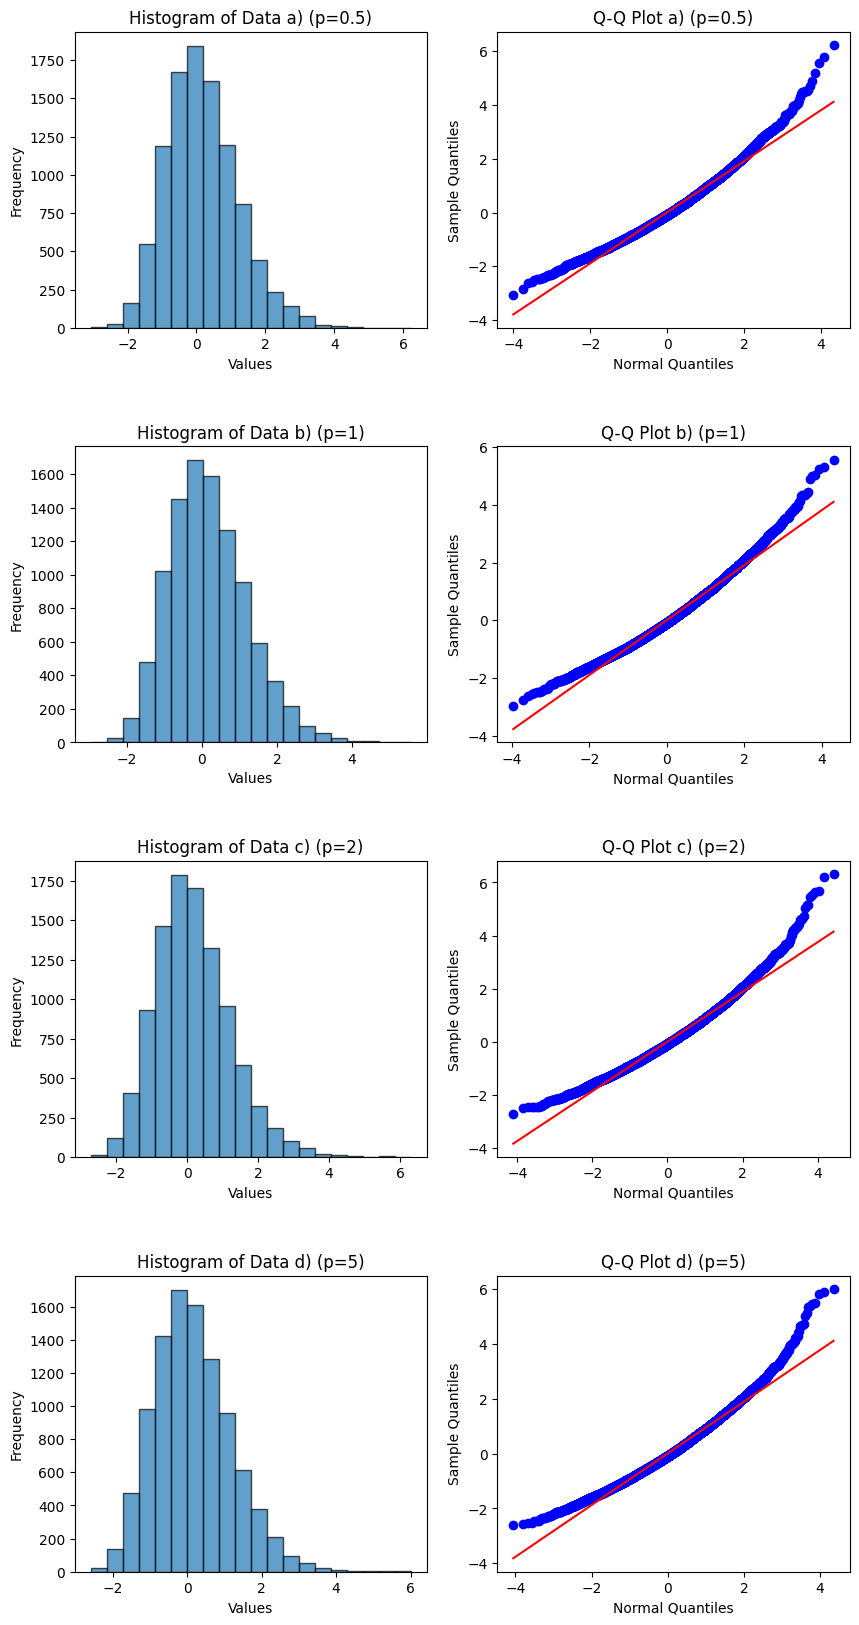

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

n = 50

def mlef(data):
    return (-n / np.sum(np.log(data)))

def fisherf(data):
    return 1 / (mlef(data)) ** 2

def yf(mle, theta, fisher):
    return np.sqrt(n * fisher) * (mle - theta)

N = 10000
name = ['a)', 'b)', 'c)', 'd)']
p = [0.5, 1, 2, 5]
w = 1

I = [] 
Ivar = []
Imean = []

fig, axes = plt.subplots(4, 2, figsize=(10, 20), gridspec_kw={'width_ratios': [1, 1]})
fig.subplots_adjust(hspace=0.4)

for j in range(4):
    fisher = []
    for i in range(N):
        np.random.seed(i)
        data = np.random.beta(p[j], w, n)
        fisher.append(fisherf(data))
    fisher = np.array(fisher)
    fisher = np.mean(fisher)
    I.append(fisher)
    Y = []
    for i in range(N):
        np.random.seed(i)
        data = np.random.beta(p[j], w, n)
        mle = mlef(data)
        y = yf(mle, p[j], fisher)
        Y.append(y)
    Ivar.append(np.var(Y))
    Imean.append(np.mean(Y))

    # Histogram
    ax1 = axes[j, 0]
    ax1.hist(Y, bins=20, edgecolor='k', alpha=0.7)
    ax1.set_xlabel('Values')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Histogram of Data ' + name[j] + ' (p=' + str(p[j]) + ')')

    # Q-Q plot
    qnum=900
    ax2 = axes[j, 1]

    normal = stats.norm(loc=Imean[j], scale=Ivar[j])
    stats.probplot(Y, dist=normal, plot=ax2)
    ax2.set_title('Q-Q Plot ' + name[j] + ' (p=' + str(p[j]) + ')')
    ax2.set_xlabel('Normal Quantiles')  # Set the x-axis label
    ax2.set_ylabel('Sample Quantiles')  # Set the y-axis label


plt.show()


W wykresach kwantylowo-kwantylowych rozważam rozkład normalny o parametrach zadanych przez średnią próbki i wariancję póbki. Możemy zaobserwować, że średnia i wariancja próbki są bliskie odpowiednio $0$ i $1$, co nie powinno nas dziwić, bo na mocy **twierdzenia o asymptotycznej normalności estymatorów największej wiarogodności** zachodzi $ \sqrt{n}(\theta-\hat{\theta})\xrightarrow{d} N(0,\frac{1}{I(\theta)})$, co daje $ \sqrt{n{I(\theta)}}(\hat{\theta}-\theta) \xrightarrow{d} N(0,1)$. Co prawda my wyznaczamy $ Y=\sqrt{n\widehat{I(\theta)}}(\hat{\theta}-\theta)$, a więc na parametry granicznego rozkładu normalnego wpływa błąd estymatora informacji Fishera. Na histogramach możemy zaobserwować kształt dzwonu, podobny do rozkładu normalnego, z widocznym parwostronnym ogonem. Z wykładu (lub podręcznika Hogga - Example 6.2.4) wiemy, że dla rozkładu $ B(\theta,1) $ estymator $\hat{\theta}$ nie jest efektywny, ale jest asymptotycznie efektywny oraz asymptotycznie nieobciążony. Rzeczywiście, przy n=10000 dzwon staje się coraz bardziej symetryczny i prosta widoczna na wykresie przypomina coraz bardziej prostą $y=x$, czyli rozkład zbiega do rozkładu normalnego.

### Zadanie 5

Podpunkt a)
Wariancja estymatora 1 0.03987832849997134
Błąd średniokwadratowy estymatora 1 0.03988734249384319
Obciążenie estymatora 1 0.003002331406064318
Wariancja estymatora 2 0.024061935239321375
Błąd średniokwadratowy estymatora 2 0.024067977958995197
Obciążenie estymatora 2 0.0024581943930093164
Wariancja estymatora 3 0.06813398194028368
Błąd średniokwadratowy estymatora 3 0.06814418021784538
Obciążenie estymatora 3 0.003193474214973291
Wariancja estymatora 4 0.03981437561076781
Błąd średniokwadratowy estymatora 4 0.1530946915897985
Obciążenie estymatora 4 0.3365714128963282
Podpunkt b)
Wariancja estymatora 1 0.03987832849997134
Błąd średniokwadratowy estymatora 1 0.039887342493843174
Obciążenie estymatora 1 0.003002331406064762
Wariancja estymatora 2 0.024061935239321375
Błąd średniokwadratowy estymatora 2 0.024067977958995197
Obciążenie estymatora 2 0.0024581943930090944
Wariancja estymatora 3 0.06813398194028368
Błąd średniokwadratowy estymatora 3 0.06814418021784538
Obciążeni

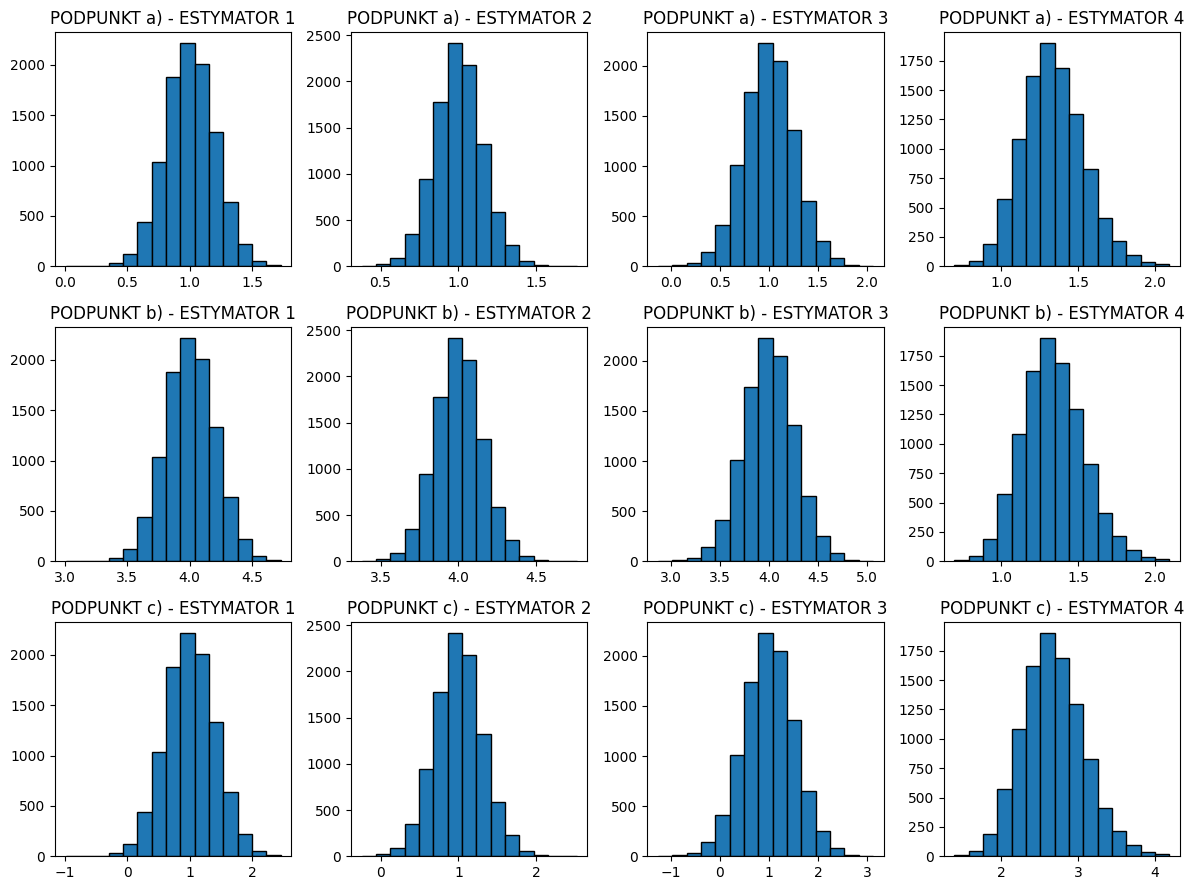

In [15]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.special import ndtri

n = 50

N = 10000
theta = [1, 4, 1]
sigma = [1, 1, 2]
name = ['a)', 'b)', 'c)']
np.random.seed(0)

weights3 = np.random.dirichlet(np.ones(n))

weights4 = []

for i in range(1, n + 1):
    lower_bound = stats.norm.ppf((i - 1) / n)
    upper_bound = stats.norm.ppf(i / n)
    weight = stats.norm.pdf(lower_bound) - stats.norm.pdf(upper_bound)
    weights4.append(weight)

def est1(data):
    return np.mean(data)

def est2(data):
    return np.median(data)

def est3(data):
    e3 = 0
    for j in range(len(data)):
        e3 += weights3[j] * data[j]
    return e3

def est4(data):
    sdata = data
    sdata.sort()
    e4 = 0
    for j in range(len(sdata)):
        e4 += weights4[j] * sdata[j]
    return e4

estymator = np.empty((N, 4))

plt.figure(figsize=(12, 9))  

for j in range(3):
    print('Podpunkt', name[j])
    for i in range(N):
        np.random.seed(i)
        data = np.random.laplace(theta[j], sigma[j], n)
        estymator[i][0] = est1(data)
        estymator[i][1] = est2(data)
        estymator[i][2] = est3(data)
        estymator[i][3] = est4(data)

    for i in range(4):
        est = estymator[:, i]

        plt.subplot(3, 4, i + 1 + j * 4)  
        plt.hist(est, bins=15, edgecolor='black')
        plt.title('PODPUNKT ' + name[j] + ' - ESTYMATOR ' + str(i + 1))

        print('Wariancja estymatora', i + 1, est.var())
        true = np.full(N, theta[j])
        errors = est - true
        squared = errors ** 2
        mse = np.mean(squared)
        o = np.mean(est) - theta[j]

        print('Błąd średniokwadratowy estymatora', i + 1, mse)
        print('Obciążenie estymatora', i + 1, o)

plt.tight_layout()  
plt.show()


Możemy zaobserwować dość dużą dokładność każdego z pierwszych trzech estymatorów. Estymator $\theta_4$ wyraźnie odbiega od reszty. W definicji tego estymatora zostały użyte funkcje z rozkładu $N(0,1)$, jednak co ciekawe, sprawdziwszy jego poprawność nawet w przypadku rozkładu $ N(0,1)$ dostaliśmy niedokładne wyniki. Teraz jest to dostrzegalne jeszcze bardziej niż w przypadku zad. 1 z listy 1 - teraz mamy do czynienia z rozkładem Laplace'a, który znacząco się różni od rozkładu normalnego. Wraz ze wzrostem n poprawia się dokładność $\theta_4$, jednak nadal jest to słaby estymator.

Na wykładzie wyliczyliśmy (Example 6.2.5 podręcznik Hogga), że asymptotyczna efektywność względna estymatorów średniej i mediany $ ARE(Q_2, \bar{X}) = 2 $. Co oznacza, że asymptotycznie mediana próbkowa (estymator 2) jest dwa razy bardziej efektywna niż średnia próbkowa (estymator 1). Możemy to zaobserwować w naszych eksperymentach.



Wybrane przeze mnie wagi w przypadku estymatora $\theta_3$ są zadane rozkładem Dirichleta. Rozkład Dirichleta jest parametryzowany wektorem dodatnich wartości, a w tym przypadku używam wektora składającego się z samych jedynek, co oznacza rozkład Dirichleta o jednakowym stężeniu. Warunek dotyczący sumowalności wag do $1$ jest spełniony. Podobnie jak w przypadku zad. 1 z listy 1, jest on stosunkowo dokładny - nei odbeiga znacząco od $\theta_1$ i $\theta_2$.

### Zadanie 6

Zad. 1 - W przypadku tego zadania różnica między n=20, a n=100 jest najmniej dostrzegalna, rząd wariancji, błędu średniokwadratowego i obciążenia nie zmienia się znacząco.

Zad. 2 - Możemy zaobserwować poprawę przy wzroście n - dokładność estymatorów wzrasta o $ \approx 2 $ miejsca dziesiętne, podobnie dla n=20 mamy mniejszą dokładność o o $ \approx 2 $  miejsca dziesiętne.

Zad. 4 - Znacząca różnica: wraz ze wzrostem n histogramy stają się bardziej symetryczne (maleją prawostronne ogony) i prosta na wykresie kwantylowo-kwantylowym coraz bardziej przypomina prostą $y=x$.

Zad. 5 -  Dla n=20 największą różnicę w dokładności estymatorów możemy dostrzec w podpunkcie c) ($\sigma=2$). Rozkład Laplace'a jest znany ze swoich ciężkich ogonów, co oznacza, że ma on większe prawdopodobieństwo generowania wartości skrajnych. To zjawisko występuje niezależnie od konkretnych wartości parametru skali czy średniej, jednakże, kiedy zwiększamy wartość parametru skali ($\sigma$) w rozkładzie Laplace'a, powoduje to rozszerzenie zakresu rozkładu, co z kolei wpływa na większą szansę obserwacji wartości skrajnych, które oddalają się od średniej rozkładu $\theta$.

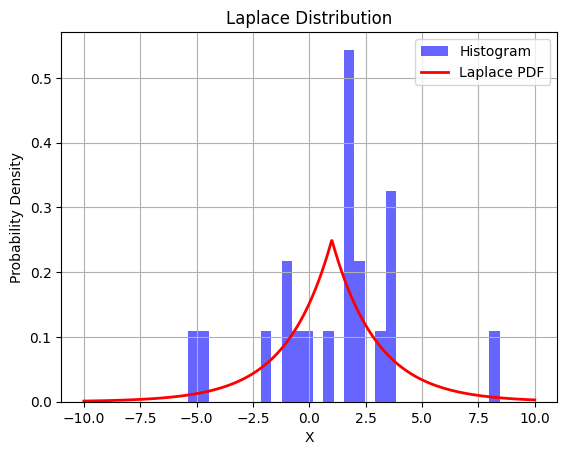

In [63]:

from scipy.stats import laplace

np.random.seed(18)
loc = 1  
scale = 2  

num_samples = 20
samples = laplace.rvs(loc=loc, scale=scale, size=num_samples)

plt.hist(samples, bins=30, density=True, alpha=0.6, color='b', label='Histogram')

x = np.linspace(-10, 10, 1000)
pdf = laplace.pdf(x, loc=loc, scale=scale)
plt.plot(x, pdf, 'r', lw=2, label='Laplace PDF')

plt.title('Laplace Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()
